### Importing necessary library

In [1]:
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load the CSV file

In [2]:
CSV_DataFrame = pd.read_csv("adult.csv")

In [3]:
# Classes in the data set
classes = ["<=50K", ">50K"]

### Encoding the data

In [4]:
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# categorical_columns = ["work_class", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

# # Iterate over each categorical column and encode its values
# for column in categorical_columns:
#     CSV_DataFrame[column] = label_encoder.fit_transform(CSV_DataFrame[column])
#     print(f"Encoded labels for '{column}': {label_encoder.classes_}")

### Handling the data imbalance for the target variable (Income)

In [5]:
# Printing the value count
income_counts = CSV_DataFrame['income'].value_counts()
print(income_counts)

income
0    36913
1    11354
Name: count, dtype: int64


In [6]:
# Separate features and target variable
X = CSV_DataFrame.drop(columns=['income'])
y = CSV_DataFrame['income']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
income_counts = y_train.value_counts()
print(income_counts)

income
0    29534
1     9079
Name: count, dtype: int64


In [9]:
from imblearn.over_sampling import SMOTE

# Over sampling applying only for the training dataset
# Apply SMOTE for oversampling
smote = SMOTE(random_state=69)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
income_counts = y_train_resampled.value_counts()
print(income_counts)

income
0    29534
1    29534
Name: count, dtype: int64


In [11]:
income_counts = y_train.value_counts()
print(income_counts)

income
0    29534
1     9079
Name: count, dtype: int64


In [12]:
income_counts = y_test.value_counts()
print(income_counts)

income
0    7379
1    2275
Name: count, dtype: int64


### Feeding the data into the model to train

#### Model without hyper parameter tuning

In [13]:
# Train Naive Bayes Classifier
naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make Predictions
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7750155376009944


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      7379
           1       0.54      0.34      0.42      2275

    accuracy                           0.78      9654
   macro avg       0.68      0.63      0.64      9654
weighted avg       0.75      0.78      0.76      9654

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

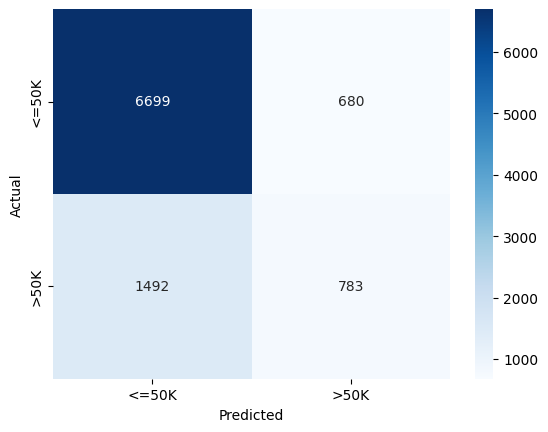

<Figure size 800x600 with 0 Axes>

In [14]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

In [15]:
# Train Naive Bayes Classifier
naive_bayes_classifier = BernoulliNB()
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred = naive_bayes_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6796146674953387


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      7379
           1       0.41      0.81      0.54      2275

    accuracy                           0.68      9654
   macro avg       0.66      0.72      0.65      9654
weighted avg       0.80      0.68      0.70      9654

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

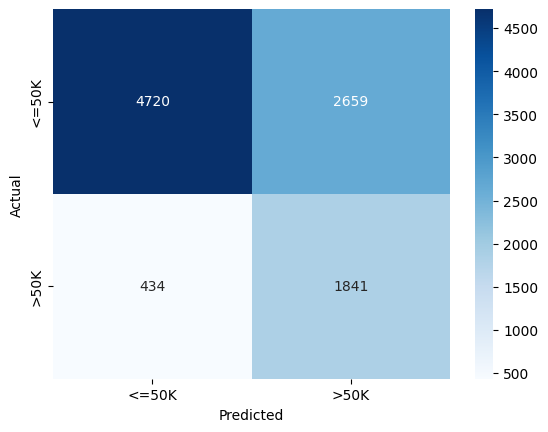

<Figure size 800x600 with 0 Axes>

In [16]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

#### Model with hyper parameter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0],
              'binarize': [0.0, 0.5, 1.0]}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=BernoulliNB(), param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'alpha': 0.1, 'binarize': 0.5}


In [18]:
# Instantiate Bernoulli Naive Bayes classifier with the best parameters
best_naive_bayes_classifier = BernoulliNB(alpha=best_params['alpha'], binarize=best_params['binarize'])

# Train the classifier on the training data
best_naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_naive_bayes_classifier.predict(X_test)

# Evaluate the model performance (e.g., accuracy)
accuracy = best_naive_bayes_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6699813548788067


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      7379
           1       0.40      0.82      0.54      2275

    accuracy                           0.67      9654
   macro avg       0.66      0.72      0.64      9654
weighted avg       0.80      0.67      0.69      9654

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

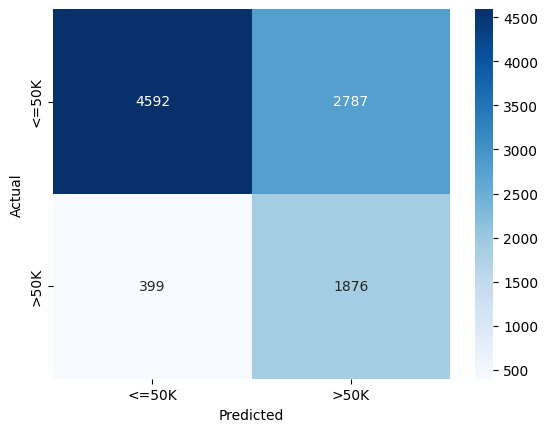

<Figure size 800x600 with 0 Axes>

In [19]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

In [20]:
# Instantiate Bernoulli Naive Bayes classifier with the best parameters
best_naive_bayes_classifier = BernoulliNB(alpha=best_params['alpha'], binarize=best_params['binarize'])

# Train the classifier on the training data
best_naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_naive_bayes_classifier.predict(X_test)

# Evaluate the model performance (e.g., accuracy)
accuracy = best_naive_bayes_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7711829293557074


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      7379
           1       0.52      0.49      0.50      2275

    accuracy                           0.77      9654
   macro avg       0.68      0.67      0.68      9654
weighted avg       0.77      0.77      0.77      9654

Confusion Matrix:


<Figure size 800x600 with 0 Axes>

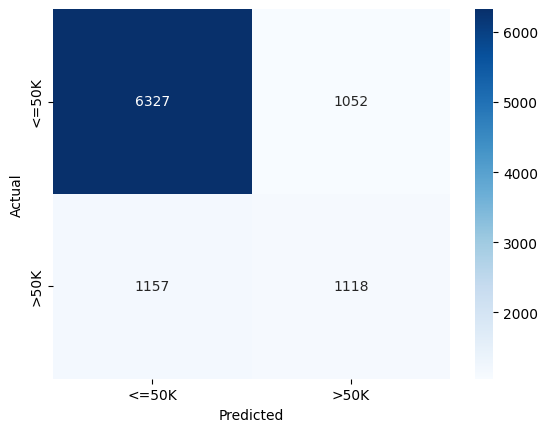

<Figure size 800x600 with 0 Axes>

In [21]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

### Saving the Naive baise model

Saving the model that has the best trade of for precision and recall

In [22]:
from joblib import dump

# Save Naïve Bayes model
dump(best_naive_bayes_classifier, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']